# 1) Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [3]:
# load data
df = pd.read_csv('../datasets/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop garbage columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# rename columns
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# create binary labels (0 and 1)
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
y = df['b_labels'].values

In [7]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size = 0.33)

In [29]:
# convert sentences into sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [30]:
tokenizer

In [31]:
# fit on tokenizer
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [32]:
# check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print("Total count of unique tokens:{}".format(V))

Total count of unique tokens:7208


In [33]:
# pad sequences
data_train = pad_sequences(sequence_train)
print("training set size:{}".format(data_train.shape))

training set size:(3733, 189)


In [34]:
# set the value of T to get sequence length
T = data_train.shape[1]

In [35]:
print(T)

189


In [36]:
# pad the test set
data_test = pad_sequences(sequence_test, maxlen=T)
print("shape of test sensor {}".format(data_test.shape))

shape of test sensor (1839, 189)


# 2) Building model


In [37]:
# create the model

# choose the embedding dimensionality
D = 20 # hyper parameter

# Input layer
i = Input(shape=(T,)) # input layer take input shape of T

# Embedding layer
x = Embedding(V + 1, D)(i) # take integers and return sequences and vectors

# Fisrt CNN layer
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# second CNN layer
x = Conv1D(64, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)

# third CNN layer
x = Conv1D(128, 3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [38]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# train model
r = model.fit(x=data_train, y = y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 4s 22ms/step - loss: 0.4002 - accuracy: 0.8591 - val_loss: 0.3139 - val_accuracy: 0.8690
Epoch 2/5
117/117 [==============================] - 2s 20ms/step - loss: 0.1888 - accuracy: 0.9178 - val_loss: 0.1569 - val_accuracy: 0.9375
Epoch 3/5
117/117 [==============================] - 3s 24ms/step - loss: 0.0376 - accuracy: 0.9890 - val_loss: 0.0785 - val_accuracy: 0.9777
Epoch 4/5
117/117 [==============================] - 4s 32ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.0885 - val_accuracy: 0.9826
Epoch 5/5
117/117 [==============================] - 2s 20ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0782 - val_accuracy: 0.9804


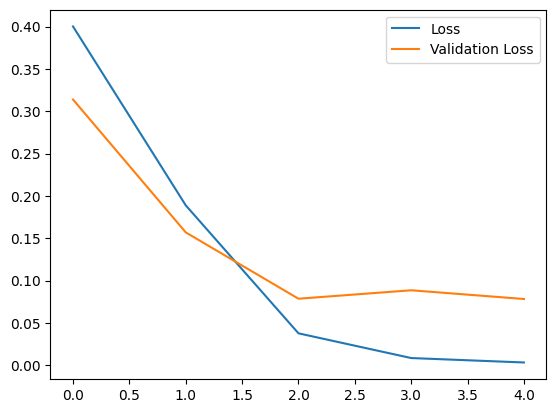

In [41]:
# Loss per iteration
import matplotlib.pyplot as plt
# shot train loss
plt.plot(r.history['loss'], label='Loss')
# show test loss
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

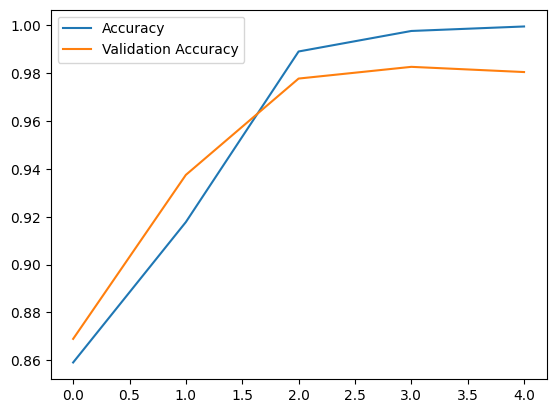

In [43]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()